<a href="https://colab.research.google.com/github/bigdatakang0000/START/blob/main/1_%EB%8F%85%ED%95%99_%EC%B6%94%EC%B8%A1%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

추측통계(표본추출)
:확률을 사용하여 모집단의 통계적 성질을 추측하는 기법

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [5]:
df = pd.read_csv('/content/drive/MyDrive/파이썬 통계분석 책_파일/source (1)/python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [11]:
np.random.choice([1,2,3], 3)   #무작위 추출이란 임의의 결과가 수반되는 계산임.
#이 함수는 기본설정으로 복원추출을 수행하고 있어 이 셀은 실행할때마다 결과가 다름

array([1, 2, 2])

In [12]:
np.random.choice([1,2,3],3, replace=False)   #인수 replace를 False로 하면 비복원 추출을 실행할 수 있다.
#무작위추출은 계산 결과가 매번 다르기 때문에 이 문제를 해결하기 위해 난수 시드(seed)를 도입하여 매번 동일한 난수를 얻을 수 있다

array([3, 2, 1])

In [13]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [15]:
np.random.seed(0)
sample=np.random.choice(scores,20)    # scores로부터 표본크기 20으로 복원추출 재현하고, 무작위추출 실행하여 표본평균 계산
sample.mean()

70.4

In [16]:
scores.mean()    #모평균이 69.53점이다. a학생이 70점일 경우 평균보다 높다.

69.53

In [19]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())   #결과: 표본평균은 대체로 70점 전후이지만, 나름대로 산포도도 나타내는 것 같다.

1번째 무작위추출로 얻은 표본평균 72.45
2번째 무작위추출로 얻은 표본평균 63.7
3번째 무작위추출로 얻은 표본평균 66.05
4번째 무작위추출로 얻은 표본평균 71.7
5번째 무작위추출로 얻은 표본평균 74.15


**확률모형**

In [20]:
dice=[1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [21]:
np.random.choice(dice, p=prob)

1

In [22]:
num_trial=100    #100번 시행
sample = np.random.choice(dice,num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [26]:
#도수분포표
freq,_ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency': freq / num_trial},
             index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


AttributeError: ignored

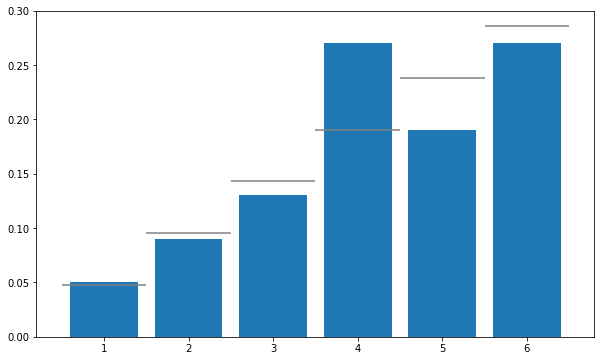

In [32]:
#실제의 확률분포와 히스토그램 그려보기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
#실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')

#막대그래프에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))

#주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlable('dice')
ax.set_ylable('relative frequency')
plt.show()

In [ ]:
#위의 결과 해석 : 100번 시행하여 얻은 눈의 상대도수로부터 추측된 확률분포와 실제의 확률분포 사이에는 상당한 차이가 있다.
다시 시행횟수를 늘려 10000번 시행하여 히스토그램 살펴보기

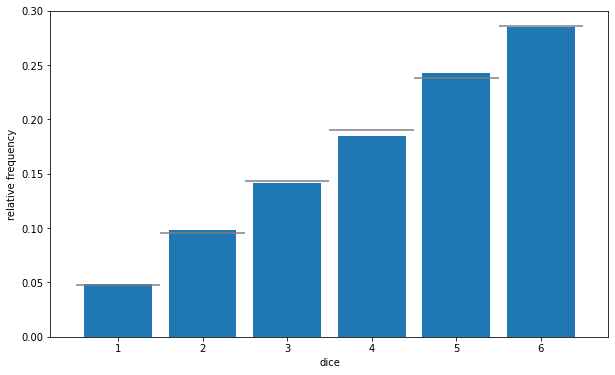

In [40]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig=plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')  #상대도수('relative frequency')가 실제의 확률분포에 가까워졌다. 시행횟수 증가시 상대도수는 확률분포로 수렴됨.
plt.show()

#확률변수 시행을 시뮬레이션하여 그 결과를 시각화 하는 것은 작위적인 방법이지만 직관적으로 이해 가능한 장점이 있음.

추측통계의 확률
:무작위 추출을 확률모형으로 기술가능, 무작위추출로 얻은 표본은 모집단의 확률분포를 따르는 확률변수로 간주. 즉, 확률변수의 실현값

AttributeError: ignored

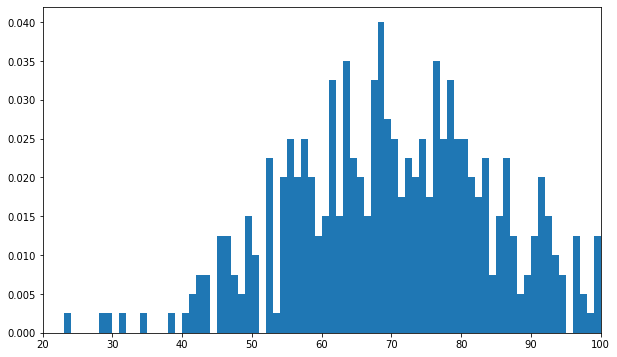

In [45]:
fig=plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlable('score')
ax.set_ylable('relative frequency')
plt.show()

#결과해석 :전교생 시험 점수에 대한 히스토그램이 나옴
#69점을 얻은 학생은 전교생의 0.04%(=4%)를 차지하고 있음. 무작위추출을 수행하면 4%확률로 69점이라는 표본 데이터를 얻게 됨
#이 결과는 다른 점수에 관해서도 상대도수(relative grequency)는 해당 점수를 얻는 확률에 대응함. 
#이 히스토그램을 모집단의 확률분포로 간주할 수 있음 (무직위추출은 확률분포룰 따르는 확률변수의 시행)

In [62]:
np. random.choice(scores)   #90점이라는 실현값을 얻음. 해석: 무작위추출로 얻은 표본데이터가 90점이었다.
#무작위추출에서 표본크기가 커지면 , 표본데이터의 상대도수는 실제의 확률분포에 가까워짐

90

AttributeError: ignored

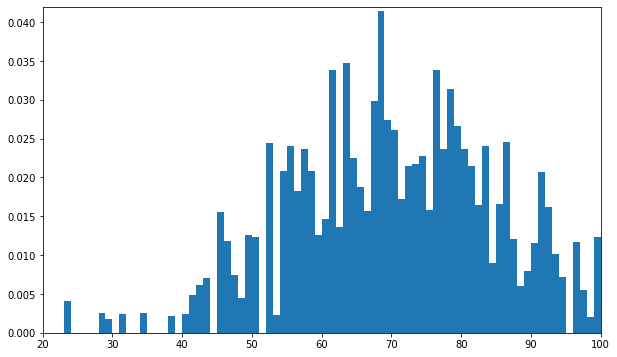

In [63]:
#무작위추출 샘플 사이즈가 10000인 표본을 추출하여 히스토그램 그리기

sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlable('score')
ax.set_ylable('relative frequency')
plt.show()

AttributeError: ignored

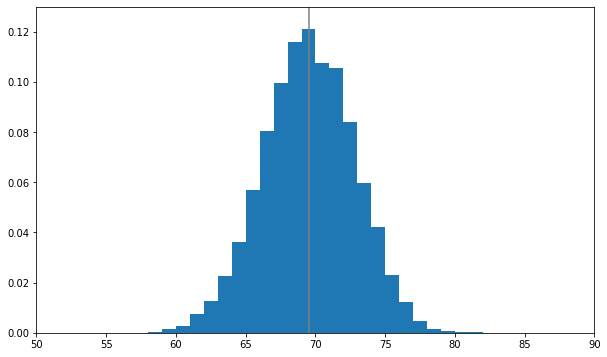

In [69]:
#표본평균 구하기
#(무작위추출로 표본크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균 분포 살펴보기)

sample_means=[np.random.choice(scores,20).mean()
              for _ in range(10000)]
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)

#모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlable('score')
ax.set_ylable('relative frequency')
plt.show()

#표본평균의 분포 그램 해석 : 그림의 세로선이 모평균.
표본평균은 산포도 그 자체. 모평균을 중심으로 분포하고 있음.
무작위추출에 의한 표본평균으로 모평균을 추측할 수 있었음.